In [1]:
# Zomato Key : 399720f6f904f106e162cd2bd0011a6f

In [20]:
# All the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
data = pd.read_csv("zomato.csv", encoding ='ISO-8859-1')
# Creating Frames
df1 = data.copy()

## Ans 1.1 Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

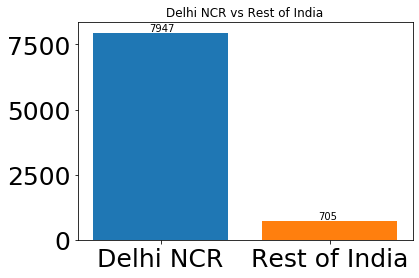

In [21]:
# Creating Frames
df1 = data.copy()
# Filtering the data
df1 = df1[df1["Country Code"]==1]
#delhi-ncr
ncr_count = df1.City[(df1.City == "Ghaziabad") | (df1.City == "Noida") | (df1.City == "Gurgaon") | (df1.City == "Faridabad") | (df1.City == "New Delhi")].count()
#rest of india
rest_count = df1.City.count() - ncr_count
# Plotting Graph
plt.title("Delhi NCR vs Rest of India")
plt.bar("Delhi NCR",ncr_count)
plt.bar("Rest of India",rest_count)
plt.text(-0.07,8000,ncr_count)
plt.text(0.93,800,rest_count)
plt.show()




## Ans 1.2 Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
data = pd.read_csv("zomato.csv", encoding ='ISO-8859-1')
# Creating Frames
df1 = data.copy()
df1 = df1[df1["Country Code"]==1]

# FOR NCR
ncr=df1[(df1.City == "Ghaziabad") | (df1.City == "Noida") | (df1.City == "Gurgaon") | (df1.City == "Faridabad") | (df1.City == "New Delhi")].Cuisines
ncr_cuisine=[]
for ele in ncr:
    ele1 = ele.split(',')
    for i in ele1:
        i=i.strip()
        ncr_cuisine.append(i)
ncr_cuisine_df = pd.DataFrame(ncr_cuisine)
unique_cuis_ncr = ncr_cuisine_df[0].unique()


# FOR REST OF INDIA
rest_india=df1[(df1.City != "Ghaziabad") & (df1.City != "Noida") & (df1.City != "Gurgaon") & (df1.City != "Faridabad") & (df1.City != "New Delhi")].Cuisines
rest_india_cuisine=[]
for ele in rest_india:
    ele1 = ele.split(',')
    for i in ele1:
        i=i.strip()
        rest_india_cuisine.append(i)
rest_india_cuisine_df = pd.DataFrame(rest_india_cuisine)
unique_cuis_rest_india = rest_india_cuisine_df[0].unique()



csv_cuisines = []
for i in unique_cuis_rest_india:
    if i not in unique_cuis_ncr:
        csv_cuisines.append(i)
print("Cuisines which are not present in restaurant of Delhi NCR but present in rest of India according to the given CSV File is ")
for ele in csv_cuisines:
    print(ele)

Cuisines which are not present in restaurant of Delhi NCR but present in rest of India according to the given CSV File is 
German
Malwani
BBQ
Cajun


In [26]:
user_key = "399720f6f904f106e162cd2bd0011a6f"
data=requests.get('https://developers.zomato.com/api/v2.1/cuisines',headers={'user-key':user_key},params={'city_id':1})
ans=data.json()['cuisines']
api_cuisine=[]
for i in ans:
    api_cuisine.append(i['cuisine']['cuisine_name'])
print("Cuisines which are present in restaurant of Delhi NCR according to API:")
for ele in csv_cuisines:
    if ele in api_cuisine:
        print(ele)


Cuisines which are present in restaurant of Delhi NCR according to API:
Malwani
BBQ


## Ans 1.3 Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [6]:

print("Top 10 cuisines served by maximum number of restaurants in Delhi NCR are: ")
ncr_cuisine_df = pd.DataFrame(ncr_cuisine)
ncr_top_10 = ncr_cuisine_df[0].value_counts()[:10]
print(ncr_top_10)
print("\n")

print("Top 10 cuisines served by maximum number of restaurants in Rest of India are: ")
rest_india_cuisine_df = pd.DataFrame(rest_india_cuisine)
rest_india_top_10 = rest_india_cuisine_df[0].value_counts()[:10]
print(rest_india_top_10)

Top 10 cuisines served by maximum number of restaurants in Delhi NCR are: 
North Indian    3597
Chinese         2448
Fast Food       1866
Mughlai          933
Bakery           697
South Indian     569
Continental      547
Desserts         542
Street Food      538
Italian          535
Name: 0, dtype: int64


Top 10 cuisines served by maximum number of restaurants in Rest of India are: 
North Indian    349
Chinese         242
Continental     177
Italian         147
Cafe            136
Fast Food        97
South Indian     62
Mughlai          59
Desserts         55
Mexican          50
Name: 0, dtype: int64


## Ans 1.4 Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

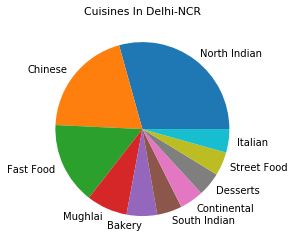

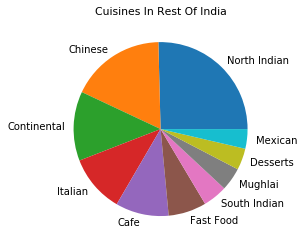

In [38]:
#delhi-ncr
ncr_cuisine_df = pd.DataFrame(ncr_cuisine)
ncr_top_10 = ncr_cuisine_df[0].value_counts()[:10]
#rest of india
rest_india_cuisine_df = pd.DataFrame(rest_india_cuisine)
rest_india_top_10 = rest_india_cuisine_df[0].value_counts()[:10]
#plotting the graph for delhi-ncr
plt.pie(ncr_top_10.values,labels=ncr_top_10.index,textprops={'fontsize': 10})
plt.title("Cuisines In Delhi-NCR")
plt.show()
#plotting the graph for rest of india
plt.pie(rest_india_top_10.values,labels=rest_india_top_10.index,textprops={'fontsize': 10})
plt.title("Cuisines In Rest Of India")
plt.show()

## Ans 2.1.1 Number of Votes given Restaurant 

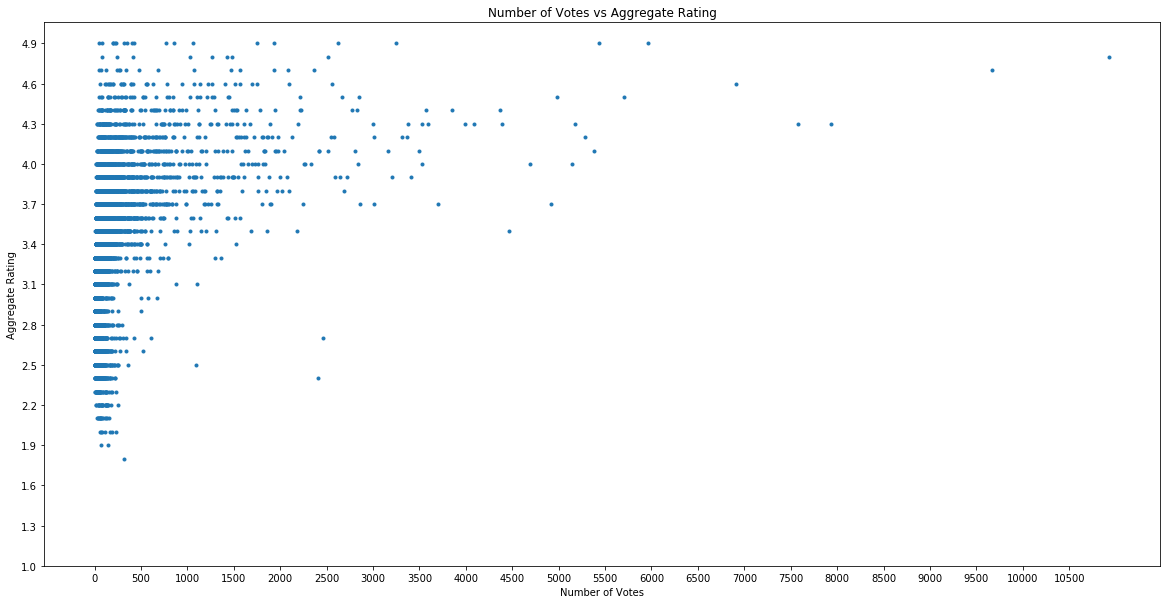

In [7]:
df_rating = df1[df1["Aggregate rating"]!=0]
plt.figure(figsize=(20,10))

plt.scatter(df_rating["Votes"],df_rating["Aggregate rating"],marker=".")
plt.title("Number of Votes vs Aggregate Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.xticks(np.arange(0,10800,step=500))
plt.yticks(np.arange(1,5,step=0.3))
plt.show()

## Ans 2.1.2 Restaurant serving more number of cuisines.

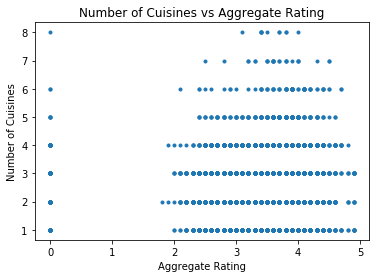

In [8]:
no_cuis=[]
for ele in df1.Cuisines:
    no_cuis.append(len(ele.strip().split(",")))


plt.scatter(df1["Aggregate rating"],no_cuis, marker=".")
plt.title("Number of Cuisines vs Aggregate Rating")
plt.ylabel("Number of Cuisines")
plt.xlabel("Aggregate Rating")
plt.show()

## Ans 2.1.3 Average Cost of Restaurant

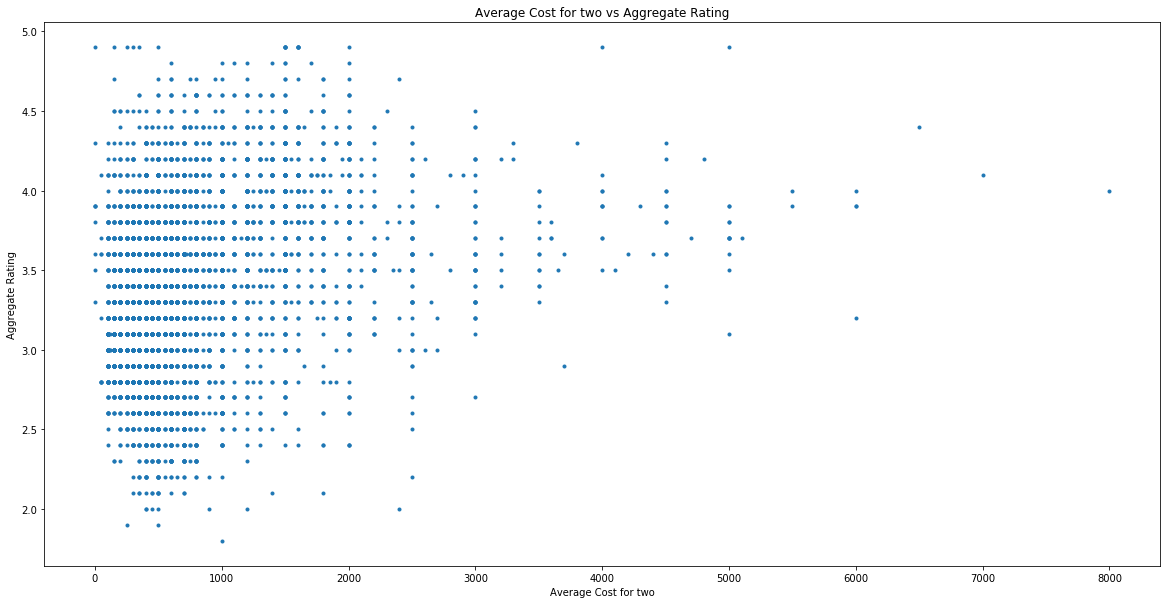

In [9]:
df_rating = df1[df1["Aggregate rating"]!=0]
plt.figure(figsize=(20,10))

plt.scatter(df_rating["Average Cost for two"],df_rating["Aggregate rating"],marker=".")
plt.title("Average Cost for two vs Aggregate Rating")
plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate Rating")
# plt.xticks(np.arange(0,10800,step=500))
# plt.yticks(np.arange(1,5,step=0.3))
plt.show()

## Ans 2.1.4 Restaurant serving some specific cuisines. 

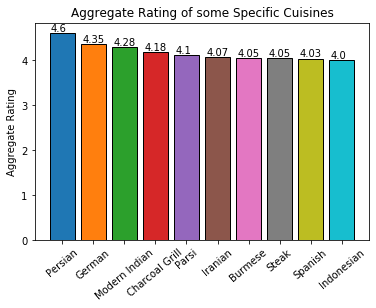

In [10]:
rating = list(df1['Aggregate rating'])
cui = list(df1['Cuisines'])
dict1={}

for i in range(len(cui)):
    cl = cui[i].split(",")
    for c in cl:
        c=c.strip()
        if c in dict1:
            if rating[i]!=0.0:
                temp_l=dict1[c]
                temp_l.append(rating[i])
                dict1[c] = temp_l
        else:
            dict1[c] = [rating[i]]


for k,v in dict1.items():
    dict1[k] = sum(v)/len(v)
# Taking names and values
cuisine = np.array(list(dict1.keys()))
rate = np.array(list(dict1.values()))
rate = np.round(rate, decimals=2)

#TOP 10 Cuisines
ind = rate.argsort()[::-1]
ind = ind[:10]
    
# Taking names and values of top 10 for graph plot
cuisine_t10 = cuisine[ind]
rate_t10 = rate[ind]

# Giving Lables  
plt.ylabel("Aggregate Rating")
plt.xticks(rotation=40)
plt.title('Aggregate Rating of some Specific Cuisines')
# Plotting bars with for loop
for i in range(len(cuisine_t10)):
    plt.bar(cuisine_t10[i],rate_t10[i],edgecolor='black')
    
# Giving graph text
plt.text(-0.36,rate_t10[0]+0.04,rate_t10[0])
plt.text(0.64,rate_t10[1]+0.04,rate_t10[1])
plt.text(1.64,rate_t10[2]+0.04,rate_t10[2])
plt.text(2.64,rate_t10[3]+0.04,rate_t10[3])
plt.text(3.64,rate_t10[4]+0.04,rate_t10[4])
plt.text(4.64,rate_t10[5]+0.04,rate_t10[5])
plt.text(5.64,rate_t10[6]+0.04,rate_t10[6])
plt.text(6.64,rate_t10[7]+0.04,rate_t10[7])
plt.text(7.64,rate_t10[8]+0.04,rate_t10[8])
plt.text(8.64,rate_t10[9]+0.04,rate_t10[9])
plt.show()


## Ans 2.2.1 Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

### Formula: Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) 

In [11]:
import numpy as np
locality=df1.Locality.unique()
df1['number_rating']=df1['Aggregate rating']*df1['Votes']
for ele in locality:
    sigma2 = df1.groupby(["Locality"])["Votes"].sum()
    sigma1 = df1.groupby(["Locality"])["number_rating"].sum()

locality = sigma1.index
sigma1=np.array(sigma1.values)
sigma2=np.array(sigma2.values)
d={}
for i in range(len(locality)):
    if sigma2[i]==0:
        ans=sigma1[i]/1
    else:
        ans=sigma1[i]/sigma2[i]
    d[locality[i]] = ans

arr = sorted(d.items(), key = lambda d:(d[1], d[0]) , reverse = True)[:10]
for ele in arr:
    print(ele[0],"%.5f"%ele[1])

Hotel Clarks Amer, Malviya Nagar 4.90000
Aminabad 4.90000
Friends Colony 4.88692
Powai 4.84187
Kirlampudi Layout 4.82016
Express Avenue Mall,  Royapettah 4.80000
Deccan Gymkhana 4.80000
Banjara Hills 4.71876
Sector 5, Salt Lake 4.70702
Riverside Mall, Gomti Nagar 4.70000


## Ans 3.1 Plot the bar graph top 15 restaurants have a maximum number of Outlets.

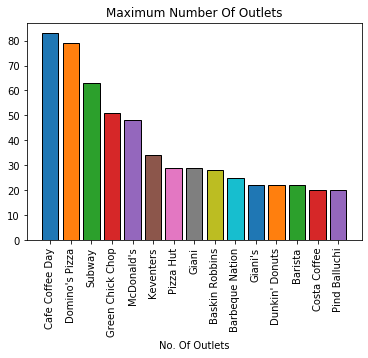

In [12]:
#filtered data on restaurant name and applied value counts and printed graph

restaurant_outlets=df1['Restaurant Name'].value_counts()[:15]

names=restaurant_outlets.index
values=restaurant_outlets.values
plt.xlabel("No. Of Outlets")
plt.title("Maximum Number Of Outlets")
plt.xticks(rotation=90)
for i in range(len(values)):
    plt.bar(names[i],values[i],edgecolor='black')
plt.show()

## Ans 3.2 Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

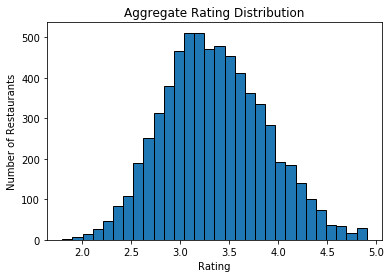

In [13]:
#filtered data on the basis of aggregate rating
df_rating = df1[df1["Aggregate rating"]!=0]
data = df_rating["Aggregate rating"].values
#plotting the graph
plt.hist(data,bins = 30 , edgecolor="#000000")
plt.ylabel("Number of Restaurants")
plt.xlabel("Rating")
plt.title("Aggregate Rating Distribution")
plt.show()

## Ans 3.3 Plot the bar graph top 10 restaurants in the data with the highest number of votes.

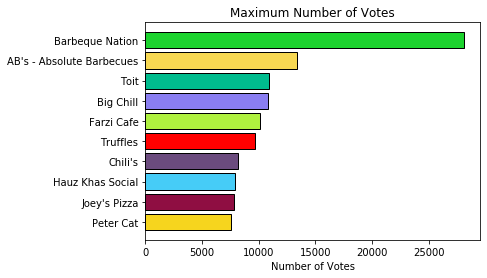

In [14]:
data = pd.read_csv("zomato.csv", encoding ='ISO-8859-1')
df7 = data.copy()

# Selecing top 10 with highest votes
data_set = df7.groupby(['Restaurant Name'])["Votes"].sum().sort_values(ascending=False)[:10]


# Storing names and values 
names = data_set.index
votes1 = data_set.values

# Plotting Graphs
plt.xlabel("Number of Votes")
plt.title('Maximum Number of Votes')
colors=["#1cd32e","#f7d852","#00bc8e","#8a7ef1","#aff13f","r","#6b4b7e","#46ccf7","#8f0e42","#f6d51e"]

for i in range(9,-1,-1):
    plt.barh(names[i],votes1[i],color=colors[i],edgecolor='#000000')

##  Ans 3.4 Plot the pie graph of top 10 cuisines present in restaurants in the USA.

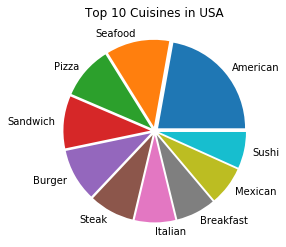

In [15]:
data = pd.read_csv("zomato.csv", encoding ='ISO-8859-1')
# Creating Frames
df_USA=data.copy()
df_USA = df_USA[df_USA["Country Code"]==216]

cuisine_USA=df_USA.Cuisines
cuisine=[]
for ele in cuisine_USA:
    ele=str(ele)
    ele1 = ele.split(',')
    for i in ele1:
        i=i.strip()
        cuisine.append(i)
cuisine=pd.DataFrame(cuisine)
cuisine=cuisine[0].value_counts()[:10]
values = cuisine.values
labels = cuisine.index
explode=[0.05]*10

plt.pie(values,labels=labels,explode=explode)
plt.title("Top 10 Cuisines in USA")
plt.show()


## Ans 3.5 Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

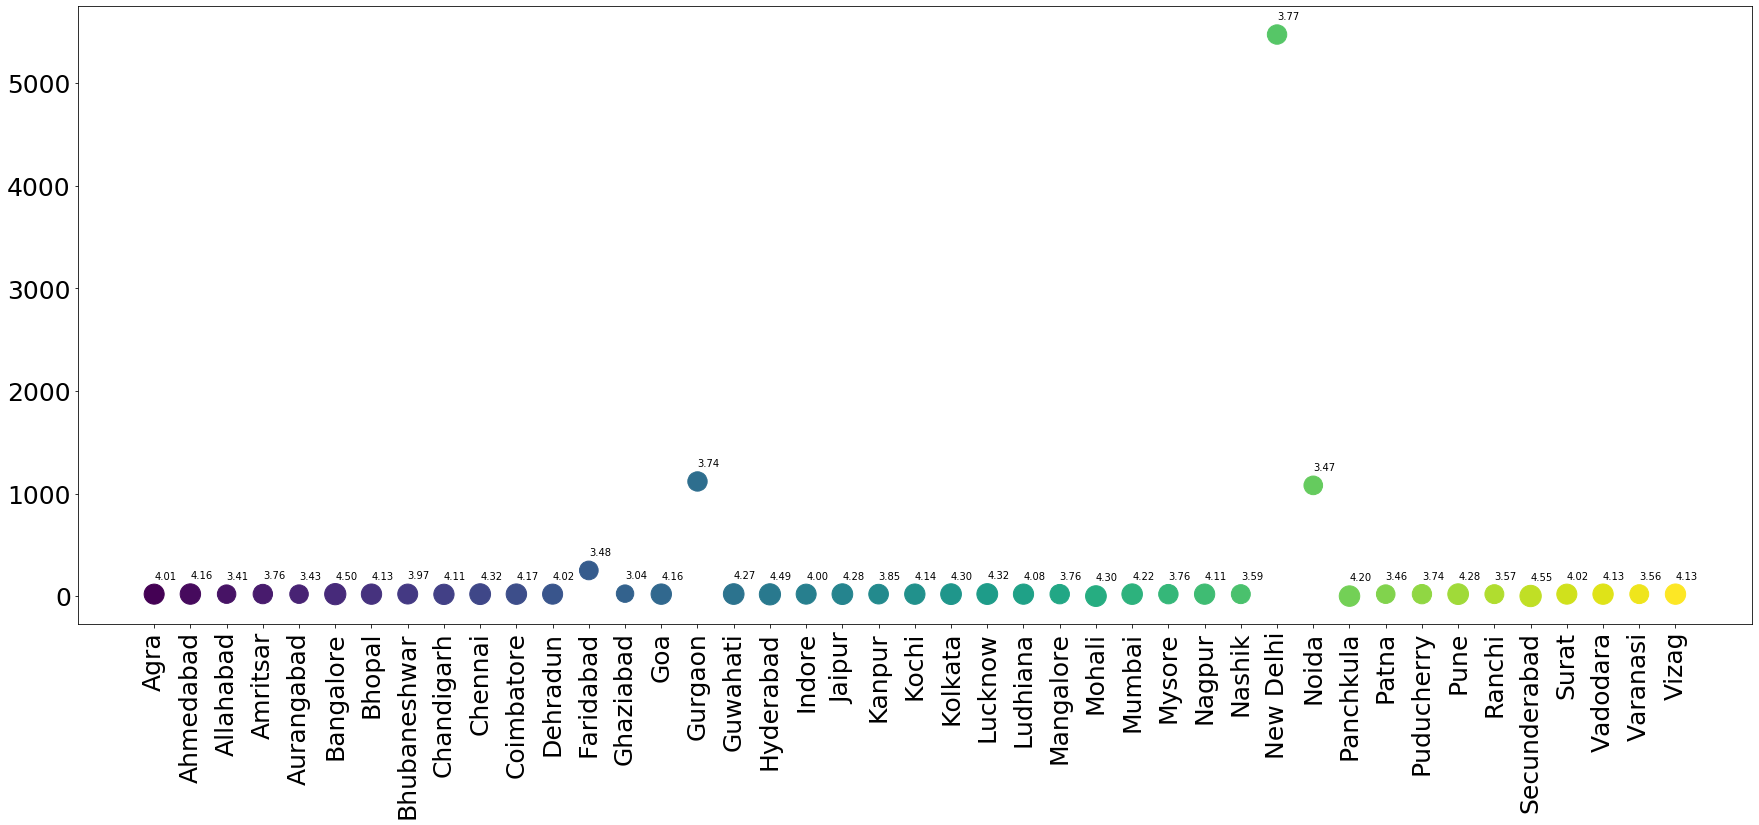

In [16]:
import numpy as np
#used the above code for weighted graph to find out weighted graph. The difference is this time did it with city.
locality=df1.Locality.unique()
df1['number_rating']=df1['Aggregate rating']*df1['Votes']
for ele in locality:
    sigma2 = df1.groupby(["City"])["Votes"].sum()
    sigma1 = df1.groupby(["City"])["number_rating"].sum()

locality = sigma1.index
sigma1=np.array(sigma1.values)
sigma2=np.array(sigma2.values)
d={}
for i in range(len(locality)):
    if sigma2[i]==0:
        ans=sigma1[i]/1
    else:
        ans=sigma1[i]/sigma2[i]
    d[locality[i]] = ans
#then created a dataframe and appended city name, count and weighted rating
number=df1['City'].value_counts()
a=number.index
df_number=pd.DataFrame(a)
df_number['number']=number.values
#sorted data alphabetically
df_number=df_number.sort_values(by=0)

new_dataframe=pd.DataFrame(d.keys())
new_dataframe['weighted']=d.values()
#plotting the graph by assigning names and values
names=np.array(new_dataframe[0])
values=np.array(df_number['number'])
weights=np.array(new_dataframe['weighted'])
colors=np.arange(len(names))+1
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)
plt.figure(1, figsize=(30, 25))
plt.subplot(211)
plt.xticks(rotation=90)
for i in range(43):
    plt.text(names[i],values[i]+150,"%.2f"%weights[i])
plt.scatter(names,values,s=weights*100,c=colors,alpha=1)
plt.show()



